## arbre de decision

In [234]:
## file banknote.csv
import pandas as pd
import numpy as np



banknote=pd.read_csv('banknote.csv', encoding='latin')
print('Shape before deleting duplicate values:', banknote.shape)

# Removing duplicate rows if any
banknote=banknote.drop_duplicates()
print('Shape After deleting duplicate values:', banknote.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
banknote.head(10)

Shape before deleting duplicate values: (1372, 5)
Shape After deleting duplicate values: (1348, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,1.0
1,4.54590,8.1674,-2.45860,-1.46210,1.0
2,3.86600,-2.6383,1.92420,0.10645,1.0
3,3.45660,9.5228,-4.01120,-3.59440,1.0
4,0.32924,-4.4552,4.57180,-0.98880,1.0
5,4.36840,9.6718,-3.96060,-3.16250,1.0
6,3.59120,3.0129,0.72888,0.56421,1.0
7,2.09220,-6.8100,8.46360,-0.60216,1.0
8,3.20320,5.7588,-0.75345,-0.61251,1.0
9,1.53560,9.1772,-2.27180,-0.73535,1.0


In [235]:

from sklearn import tree
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(banknote,test_size=0.2,random_state=428)

Predictors=['variance of Wavelet','skewness of Wavelet','curtosis of Wavelet','entropy']
TargetVariable = 'class'

X_train_set=train_set[Predictors].values
y_train_set=train_set[TargetVariable].values
X_test_set=train_set[Predictors].values
y_test_set=train_set[TargetVariable].values

X=banknote[Predictors].values
y=banknote[TargetVariable].values

#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

## max_depth,      
## criterion{“gini”, “entropy”}, default=”gini”
## min_samples_splitint or float, default=2   :The minimum number of samples required to split an internal node:
## min_samples_leafint or float, default=1:
##   The minimum number of samples required to be at a leaf node. 
##   A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train_set,y_train_set)
prediction=DTree.predict(X_test_set)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_set, prediction))
print(metrics.confusion_matrix(y_test_set, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_set, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       589
         2.0       0.99      0.99      0.99       489

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078

[[582   7]
 [  6 483]]
Accuracy of the model on Testing Sample Data: 0.99

Accuracy values for 10-fold Cross Validation:
 [0.97781456 0.97042916 0.94036257 0.95560956 0.97042916 0.94810788
 0.97779253 0.97781456 0.97764576 0.95522388]

Final Average Accuracy of the model: 0.97


<AxesSubplot:>

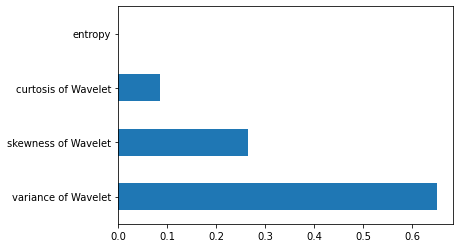

In [236]:
import matplotlib.pyplot as plt

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')



In [237]:
 from sklearn.tree import export_text

r = export_text(clf, feature_names=Predictors)
    
print(r)  

|--- variance of Wavelet <= 0.71
|   |--- skewness of Wavelet <= 5.16
|   |   |--- curtosis of Wavelet <= 3.05
|   |   |   |--- class: 2.0
|   |   |--- curtosis of Wavelet >  3.05
|   |   |   |--- skewness of Wavelet <= -1.73
|   |   |   |   |--- class: 2.0
|   |   |   |--- skewness of Wavelet >  -1.73
|   |   |   |   |--- class: 1.0
|   |--- skewness of Wavelet >  5.16
|   |   |--- variance of Wavelet <= -3.44
|   |   |   |--- class: 2.0
|   |   |--- variance of Wavelet >  -3.44
|   |   |   |--- class: 1.0
|--- variance of Wavelet >  0.71
|   |--- curtosis of Wavelet <= -4.46
|   |   |--- skewness of Wavelet <= 7.02
|   |   |   |--- class: 2.0
|   |   |--- skewness of Wavelet >  7.02
|   |   |   |--- class: 1.0
|   |--- curtosis of Wavelet >  -4.46
|   |   |--- variance of Wavelet <= 1.59
|   |   |   |--- curtosis of Wavelet <= -2.29
|   |   |   |   |--- class: 2.0
|   |   |   |--- curtosis of Wavelet >  -2.29
|   |   |   |   |--- class: 1.0
|   |   |--- variance of Wavelet >  1.59
| 

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


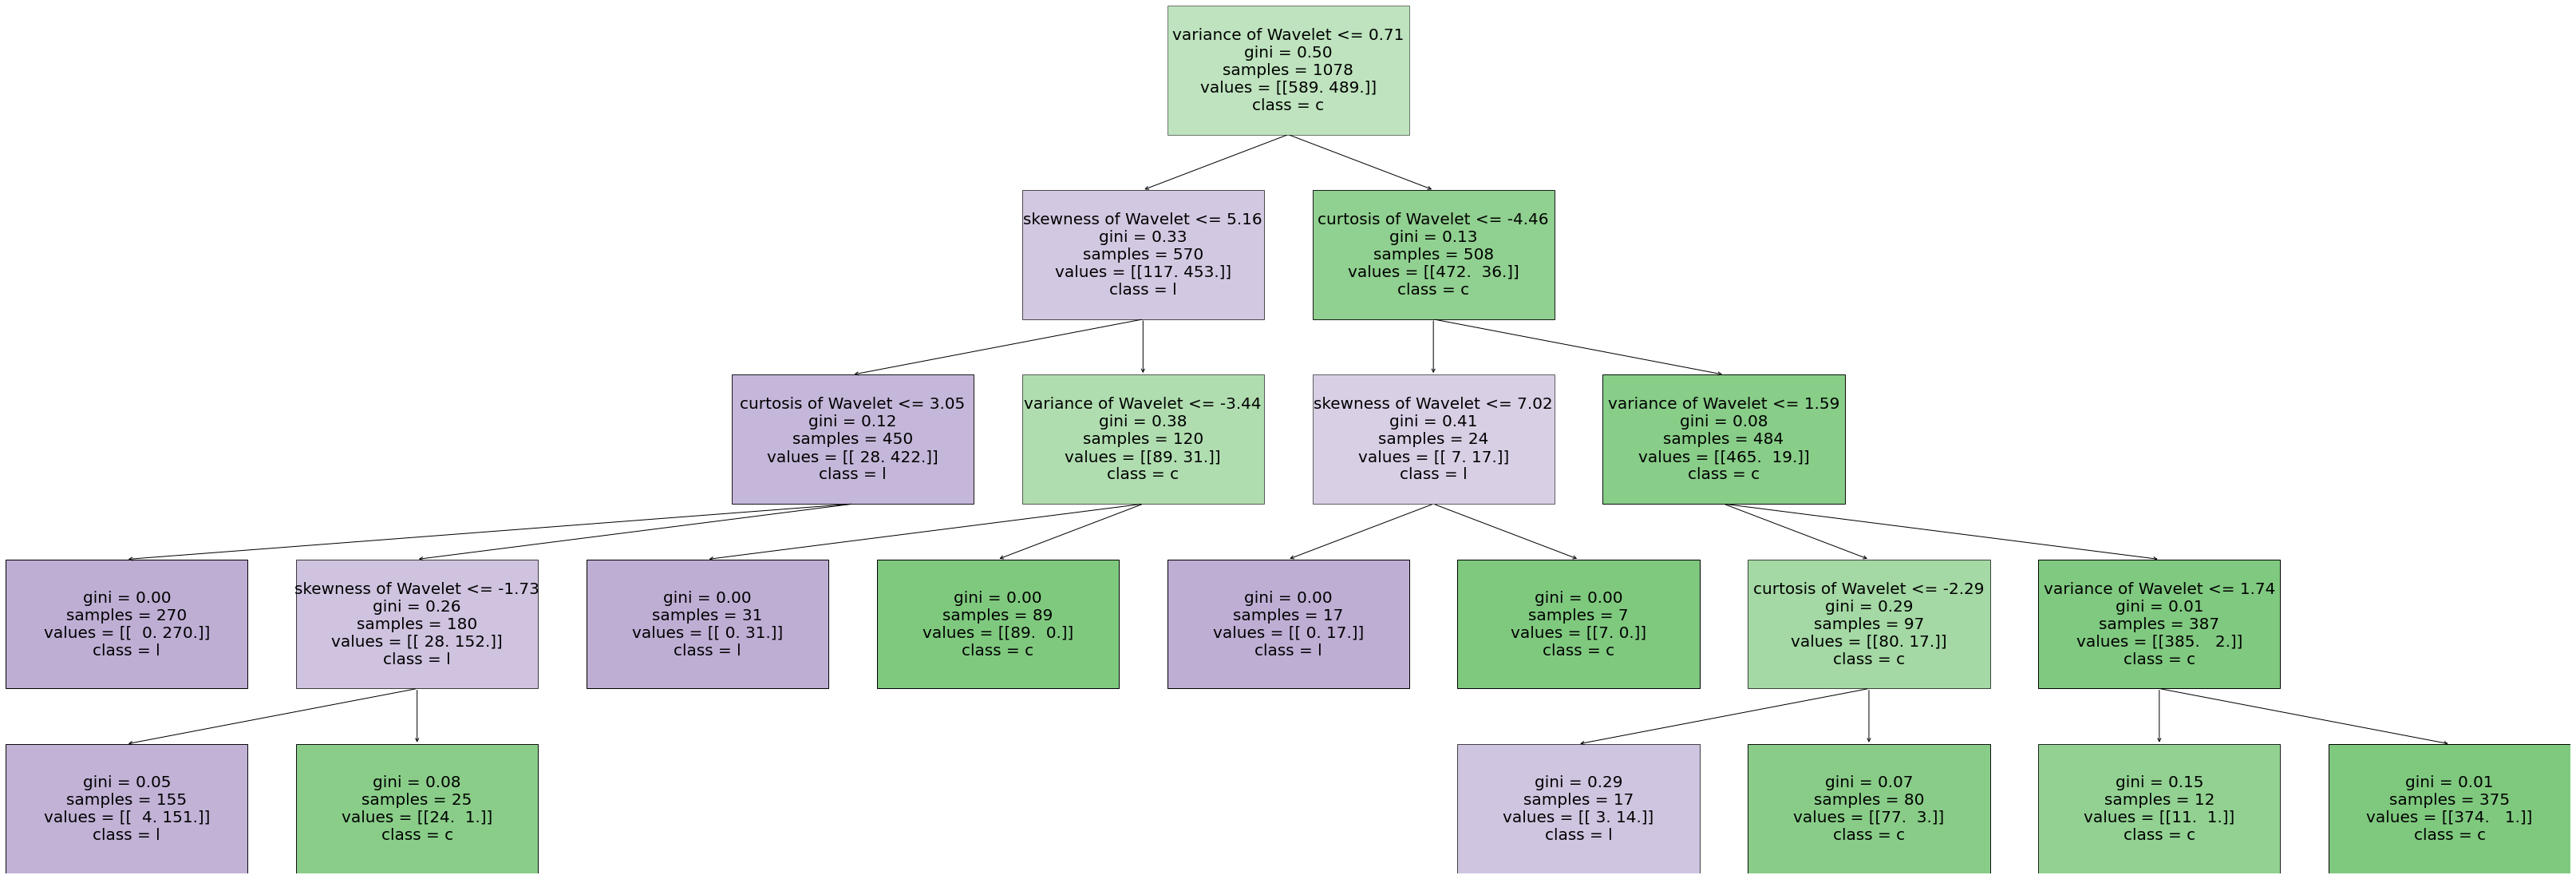

In [238]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()


## SHAP

In [239]:
### pip install shap

# import shap library
import shap


## delete the column of y

a=train_set.drop(labels='class',axis=1)
a.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy
323,3.88400,10.0277,-3.92980,-4.081900
1290,0.11032,1.9741,-3.36680,-0.652590
994,-0.87340,1.6533,-2.19640,-0.780610
1077,-1.60010,-9.5828,9.40440,0.081882
929,-3.91720,2.6652,0.78886,-0.781900


In [240]:
explainer = shap.Explainer(DTree, a)


In [241]:
## get the shap values

shap_values = explainer(a)


In [242]:
shap_values

.values =
array([[[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225],
        [ 0.        ,  0.        ]],

       [[-0.28989407,  0.28989407],
        [-0.05044301,  0.05044301],
        [-0.20031085,  0.20031085],
        [ 0.        ,  0.        ]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.42751054, -0.42751055],
        [-0.07447957,  0.07447957],
        [ 0.10365445, -0.10365445],
        [ 0.        ,  0.        ]],

       [[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225],
        [ 0.        ,  0.        ]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793,

## we can see that, for a binary classification. For each feature, each observation, we have two shap values, (one for class 1.0, one for class 2.0) 

In [243]:
shap_values.values[0]

array([[ 0.30400874, -0.30400874],
       [ 0.18709893, -0.18709893],
       [-0.03442225,  0.03442225],
       [ 0.        ,  0.        ]])

### waterfall

In [244]:
## because the function waterfall_plot()
Nfeature=4

class helper_object():
    """
    This wraps the shap object.
    It takes as input i, which indicates the index of the observation to be explained.
    """
    def __init__(self, i):
        self.base_values = shap_values.base_values[i][0]
        self.data = a.iloc[i]
        self.feature_names = a.columns.to_list()
        self.values = []
        for j in range(Nfeature):
            self.values.append(shap_values.values[i][j][0])
        self.values= np.array(self.values)

print(helper_object(0).values)  
print(helper_object(0).data)
print(helper_object(0).base_values)
print(helper_object(0).feature_names)


[ 0.30400874  0.18709893 -0.03442225  0.        ]
variance of Wavelet     3.8840
skewness of Wavelet    10.0277
curtosis of Wavelet    -3.9298
entropy                -4.0819
Name: 323, dtype: float64
0.5406479316888039
['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet', 'entropy']


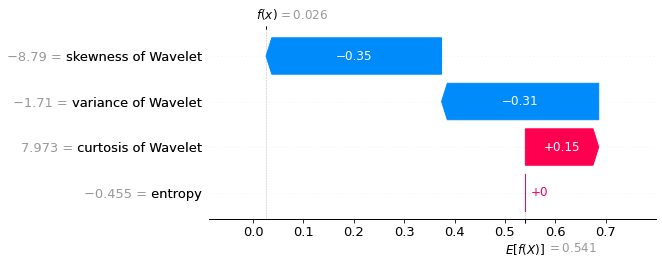

In [245]:
## give the waterfall plot of the 81th observation

shap.waterfall_plot(helper_object(80), len(shap_values[0]))




### scatter

In [246]:
shap_values.values

array([[[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225],
        [ 0.        ,  0.        ]],

       [[-0.28989407,  0.28989407],
        [-0.05044301,  0.05044301],
        [-0.20031085,  0.20031085],
        [ 0.        ,  0.        ]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.42751054, -0.42751055],
        [-0.07447957,  0.07447957],
        [ 0.10365445, -0.10365445],
        [ 0.        ,  0.        ]],

       [[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225],
        [ 0.        ,  0.        ]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953],
        [ 0.        ,  0.        ]]])

In [247]:
shap_values[:,0]

.values =
array([[ 0.30400874, -0.30400874],
       [-0.28989407,  0.28989407],
       [-0.32526539,  0.3252654 ],
       ...,
       [ 0.42751054, -0.42751055],
       [ 0.30400874, -0.30400874],
       [-0.32526539,  0.3252654 ]])

.base_values =
array([[0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       ...,
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207]])

.data =
array([ 3.884  ,  0.11032, -0.8734 , ...,  4.3846 ,  2.4008 , -1.0833 ])

In [248]:
shap_values[:,0,0]

.values =
array([ 0.30400874, -0.28989407, -0.32526539, ...,  0.42751054,
        0.30400874, -0.32526539])

.base_values =
array([0.54064793, 0.54064793, 0.54064793, ..., 0.54064793, 0.54064793,
       0.54064793])

.data =
array([ 3.884  ,  0.11032, -0.8734 , ...,  4.3846 ,  2.4008 , -1.0833 ])

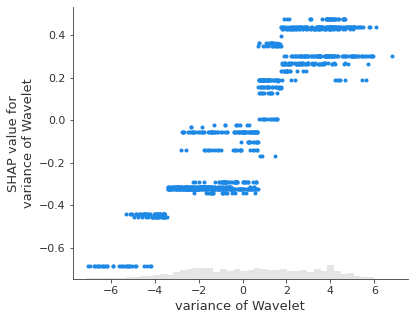

In [249]:
shap.plots.scatter(shap_values[:,0,0])   

## the last 0 means, we take the shap value of class 0
## the first 0 means, we want to see influence of feature[0]: variance of Wavelet

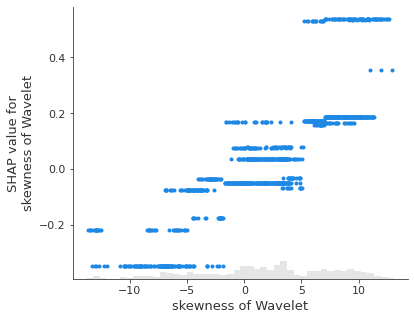

In [250]:
shap.plots.scatter(shap_values[:,1,0])   

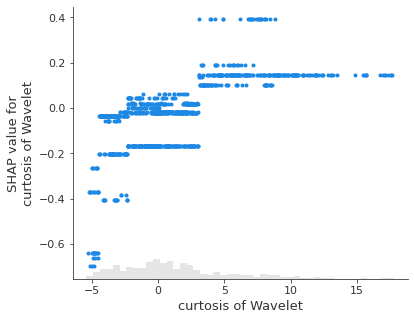

In [251]:
shap.plots.scatter(shap_values[:,2,0])   

### beeswarm

In [252]:
shap_values2=shap_values.values[:,:,0]

In [253]:
shap_values2

## get the shap values, of class1.0

array([[ 0.30400874,  0.18709893, -0.03442225,  0.        ],
       [-0.28989407, -0.05044301, -0.20031085,  0.        ],
       [-0.32526539, -0.05044301, -0.16493952,  0.        ],
       ...,
       [ 0.42751054, -0.07447957,  0.10365445,  0.        ],
       [ 0.30400874,  0.18709893, -0.03442225,  0.        ],
       [-0.32526539, -0.05044301, -0.16493952,  0.        ]])

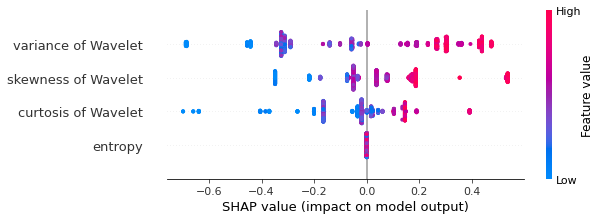

In [254]:
shap.summary_plot(shap_values2, a)


### bar

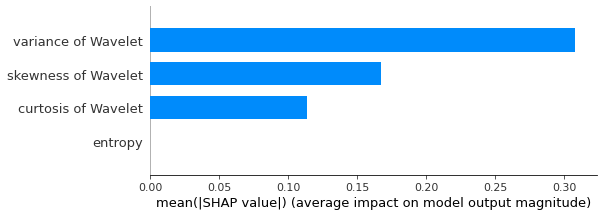

In [255]:
shap.summary_plot(shap_values2,a,plot_type="bar")

### force

In [256]:
## I do not know why
shap.initjs()


In [257]:
shap.plots.force(explainer.expected_value[0],shap_values2,feature_names=Predictors)

In [258]:
shap_values2[:,0]

array([ 0.30400874, -0.28989407, -0.32526539, ...,  0.42751054,
        0.30400874, -0.32526539])

In [259]:
newdt=train_set.copy()
shapdt=pd.DataFrame({})

for i in range(Nfeature):
    newdt['shap '+str(i)]=shap_values2[:,i]
    shapdt['shap'+str(i)]=shap_values2[:,i]
    
newdt.index=[i for i in range(len(train_set))]
shapdt.index=[i for i in range(len(train_set))]



In [260]:
newdt

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class,shap 0,shap 1,shap 2,shap 3
0,3.88400,10.02770,-3.92980,-4.081900,1.0,0.304009,0.187099,-0.034422,0.0
1,0.11032,1.97410,-3.36680,-0.652590,2.0,-0.289894,-0.050443,-0.200311,0.0
2,-0.87340,1.65330,-2.19640,-0.780610,2.0,-0.325265,-0.050443,-0.164940,0.0
3,-1.60010,-9.58280,9.40440,0.081882,2.0,-0.312018,-0.348447,0.145624,0.0
4,-3.91720,2.66520,0.78886,-0.781900,2.0,-0.455265,0.079557,-0.164940,0.0
...,...,...,...,...,...,...,...,...,...
1073,-4.22490,6.26990,0.15822,-5.545700,2.0,-0.684465,0.159957,-0.016140,0.0
1074,1.33490,6.11890,0.46497,0.498260,1.0,0.187936,0.173766,0.060151,0.0
1075,4.38460,-4.87940,3.36620,-0.029324,1.0,0.427511,-0.074480,0.103654,0.0
1076,2.40080,9.35930,-3.35650,-3.352600,1.0,0.304009,0.187099,-0.034422,0.0


In [165]:
shapdt

,shap0,shap1,shap2,shap3
0,0.304009,0.187099,-0.034422,0.0
1,-0.289894,-0.050443,-0.200311,0.0
2,-0.325265,-0.050443,-0.164940,0.0
3,-0.312018,-0.348447,0.145624,0.0
4,-0.455265,0.079557,-0.164940,0.0
...,...,...,...,...
1073,-0.684465,0.159957,-0.016140,0.0
1074,0.187936,0.173766,0.060151,0.0
1075,0.427511,-0.074480,0.103654,0.0
1076,0.304009,0.187099,-0.034422,0.0


In [300]:
##newdt.to_csv("d:/test.csv")
## download the excel file 

### LIME

In [262]:

from lime import lime_tabular

explainer3 = lime_tabular.LimeTabularExplainer(X_train_set,mode="classification",feature_names=Predictors,class_names=TargetVariable)


In [263]:


## give the explanation of the 11th observation

i=12;

explanation = explainer3.explain_instance(X_train_set[i], DTree.predict_proba,
                                         num_features=len(Predictors),top_labels=1)



In [264]:
print("N of observation: ",i)
print("feature values:")
print(X_train_set[i])
print("class")
print(y_train_set[i])
print("predict of class")
print(DTree.predict([X_train_set[i]]))
print("explanation value")
print(explanation.as_map())

N of observation:  12
feature values:
[-1.3995  -1.9162   2.5154   0.59912]
class
2.0
predict of class
[2.]
explanation value
{1: [(0, 0.2883762370613941), (1, 0.23832299623077124), (2, 0.04277043001075436), (3, -0.011605072009723005)]}


In [265]:
list(explanation.as_map().values())[0]

[(0, 0.2883762370613941),
 (1, 0.23832299623077124),
 (2, 0.04277043001075436),
 (3, -0.011605072009723005)]

In [266]:
explanation.show_in_notebook()


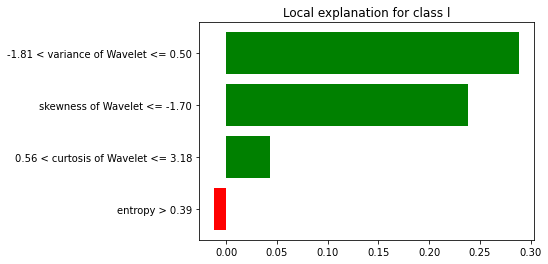

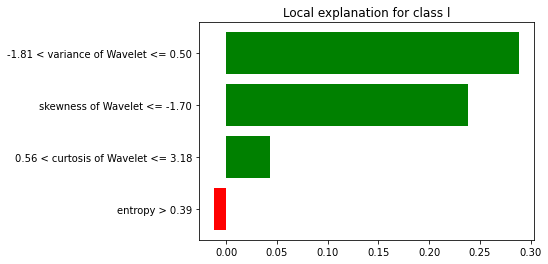

In [267]:
explanation.as_pyplot_figure()

In [271]:
dt={}

a=[]
b=[]
c=[]
d=[]

for i in range(30):
    explanation = explainer3.explain_instance(X_train_set[i], DTree.predict_proba,
                                         num_features=len(Predictors),top_labels=1)
    x=list(explanation.as_map().values())[0]
    a.append(x[0][1])
    b.append(x[1][1])
    c.append(x[2][1])
    d.append(x[3][1])
 



## need running 2 minute (maybe) , very very slow, the LIME





In [272]:

dt=train_set[:30].copy()
dt['LIME variance of Wavelet']=a
dt['LIME skewness of Wavelet']=b
dt['LIME curtosis of Wavelet']=c
dt['LIME entropy']=d

dt.index=[i for i in range(30)]


In [273]:
dt

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class,LIME variance of Wavelet,LIME skewness of Wavelet,LIME curtosis of Wavelet,LIME entropy
0,3.88400,10.02770,-3.929800,-4.081900,1.0,0.462693,0.278781,-0.158366,0.009551
1,0.11032,1.97410,-3.366800,-0.652590,2.0,0.293003,0.177852,0.088190,0.008908
2,-0.87340,1.65330,-2.196400,-0.780610,2.0,0.302340,0.168091,0.057655,0.015655
3,-1.60010,-9.58280,9.404400,0.081882,2.0,0.279201,-0.260831,0.249127,-0.017172
4,-3.91720,2.66520,0.788860,-0.781900,2.0,0.514457,0.028947,-0.023105,-0.013650
5,2.98560,7.26730,-0.409000,-2.243100,1.0,0.454150,0.274397,-0.018003,0.017485
6,-2.57010,-6.84520,8.999900,2.135300,2.0,0.478463,0.260099,-0.239570,-0.001040
7,-2.21530,11.96250,0.078538,-7.785300,1.0,-0.514348,0.281696,-0.039928,-0.029362
8,1.15880,8.93310,-2.080700,-1.127200,1.0,0.277476,0.269667,-0.163962,0.006819
9,-0.89809,-4.48620,2.200900,0.507310,2.0,0.274813,0.246523,0.030015,-0.018945


In [284]:
dtlime=pd.DataFrame()
dtlime['LIME 0']=a
dtlime['LIME 1']=b
dtlime['LIME 2']=c
dtlime['LIME 3']=d

dtlime

,LIME 0,LIME 1,LIME 2,LIME 3
0,0.462693,0.278781,-0.158366,0.009551
1,0.293003,0.177852,0.088190,0.008908
2,0.302340,0.168091,0.057655,0.015655
3,0.279201,-0.260831,0.249127,-0.017172
4,0.514457,0.028947,-0.023105,-0.013650
5,0.454150,0.274397,-0.018003,0.017485
6,0.478463,0.260099,-0.239570,-0.001040
7,-0.514348,0.281696,-0.039928,-0.029362
8,0.277476,0.269667,-0.163962,0.006819
9,0.274813,0.246523,0.030015,-0.018945


### hierarchical clustering

In [278]:
from scipy.cluster.hierarchy import dendrogram, linkage


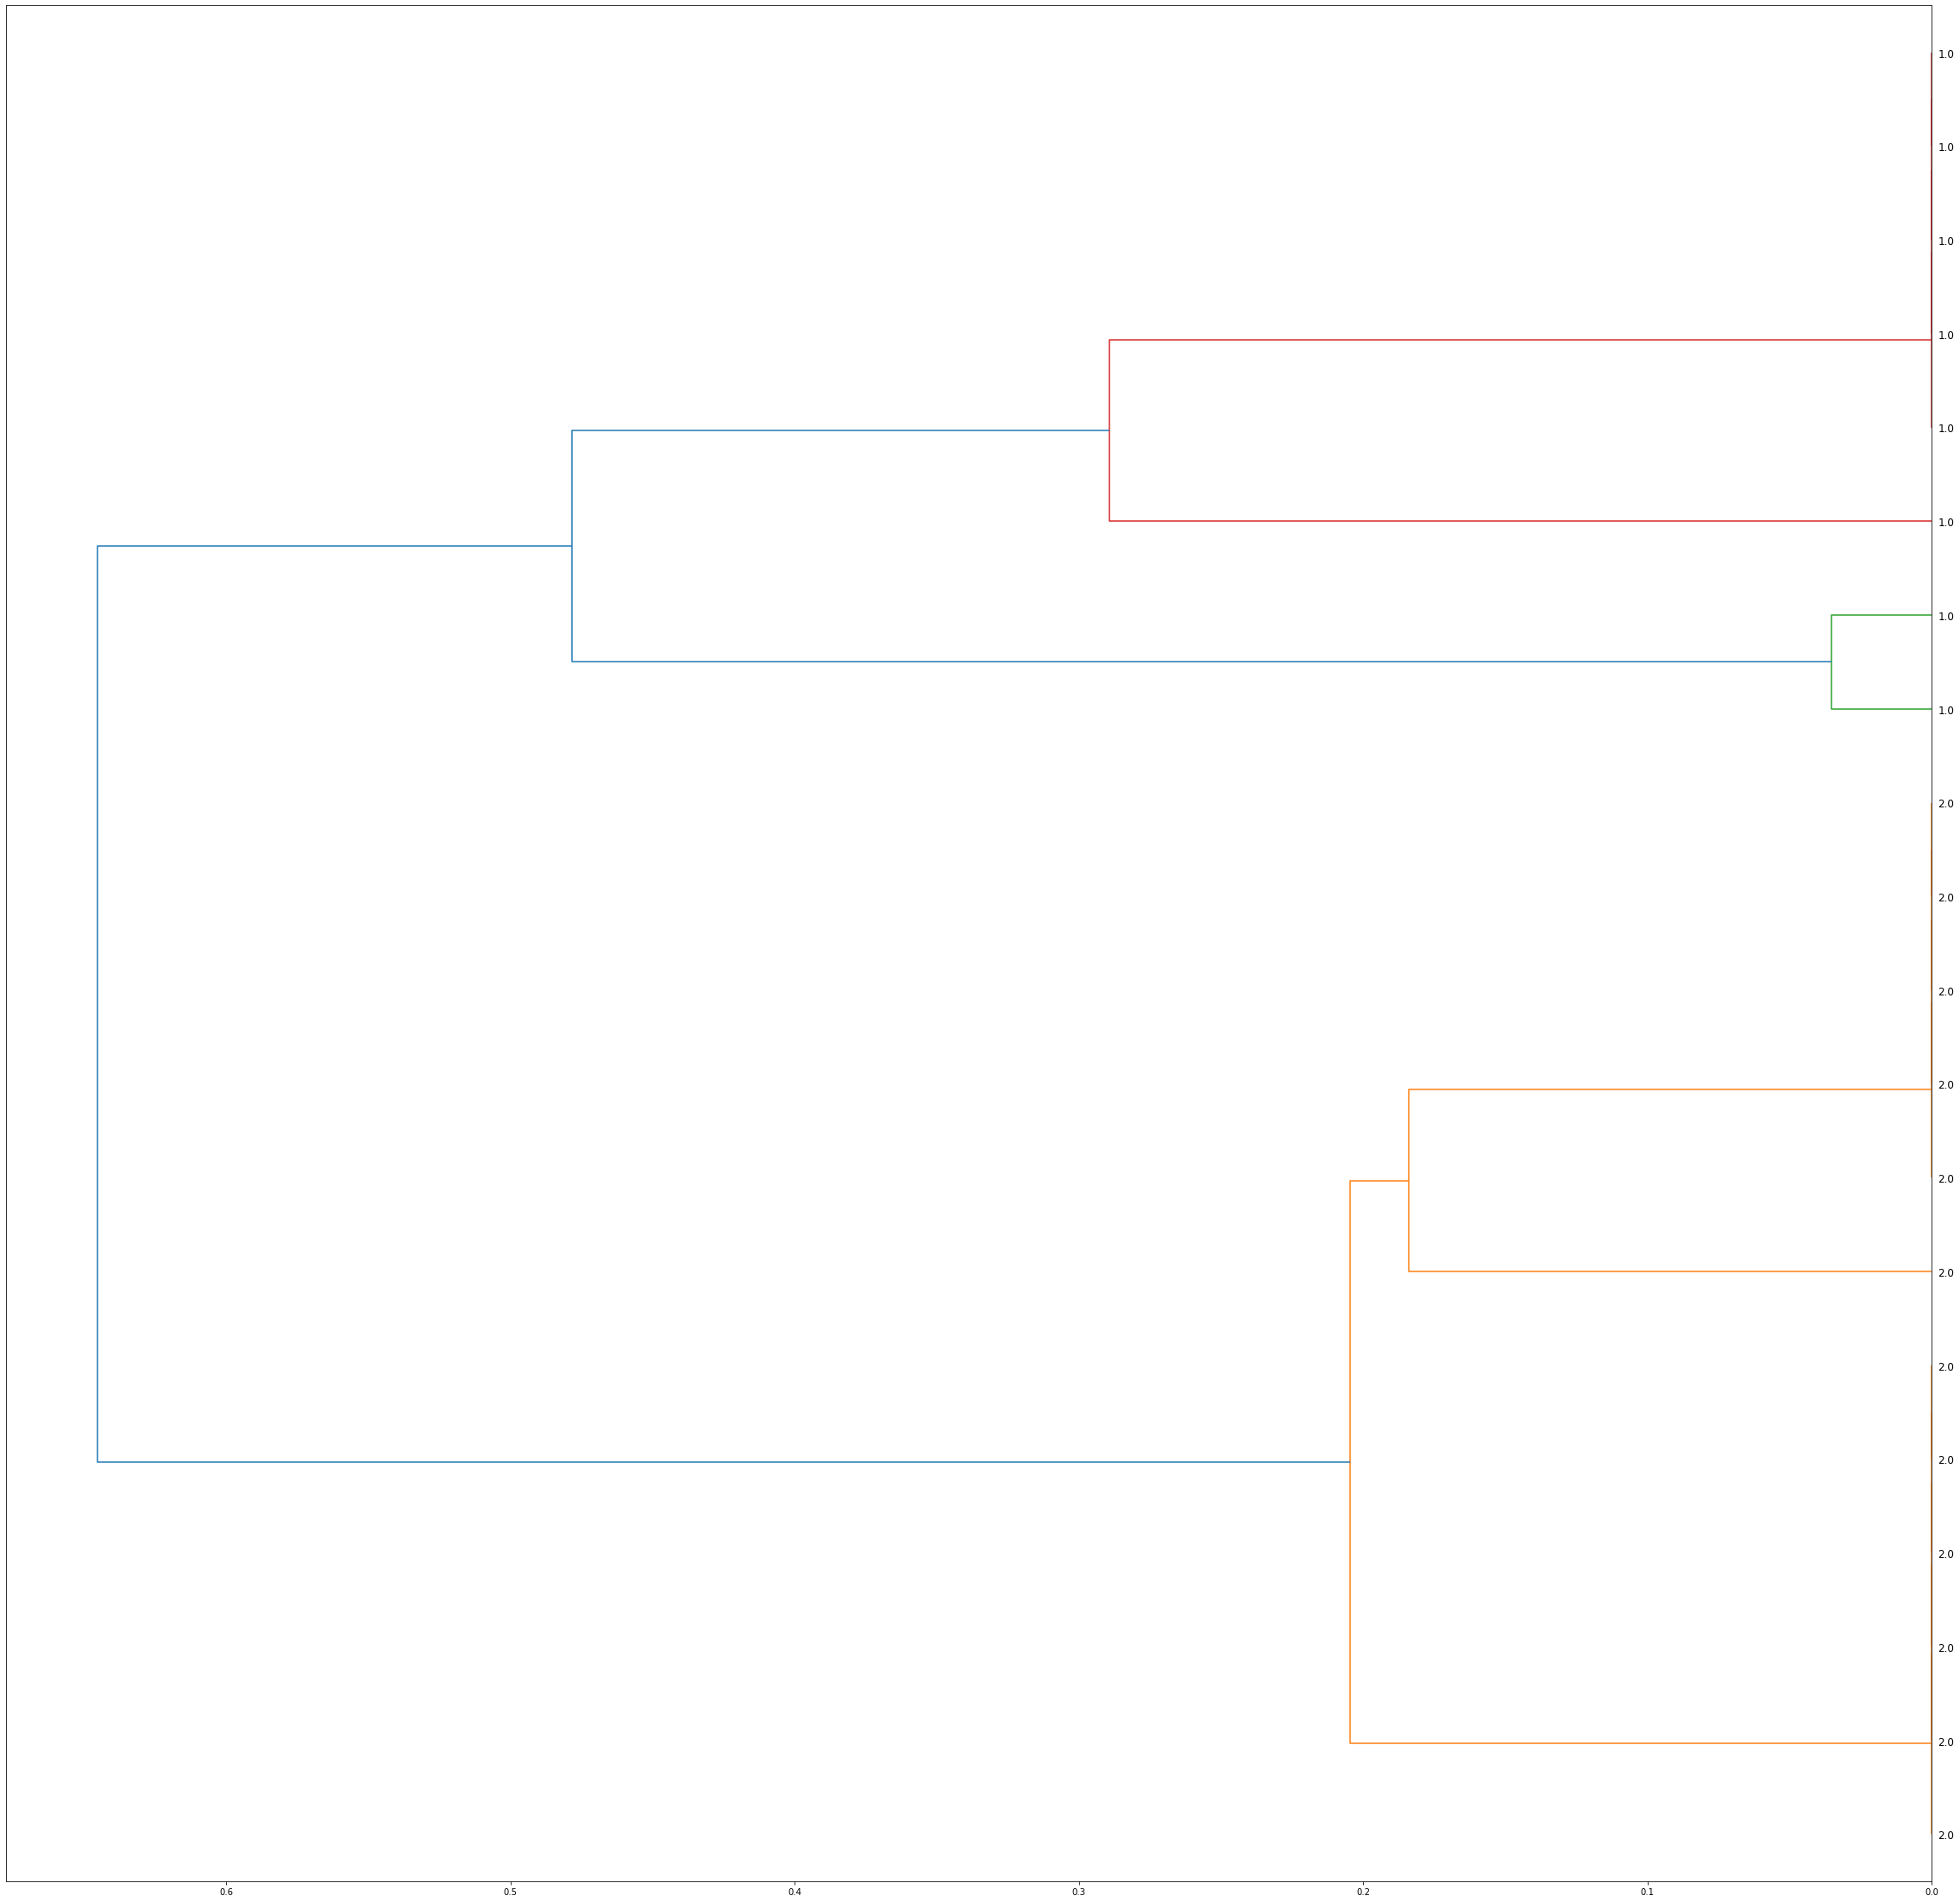

In [282]:
newshapdt=shapdt.copy()
## see the shapdt in the end of shap value plot

## add the column of class
newshapdt['class']=newdt['class']

newshapdt=newshapdt[100:120].copy()


plt.figure(figsize=(40,40))

tree = linkage(newshapdt[['shap0','shap1']])
D = dendrogram(tree, labels=newshapdt['class'].to_numpy(),orientation='left')


plt.show()

### k-means clustering

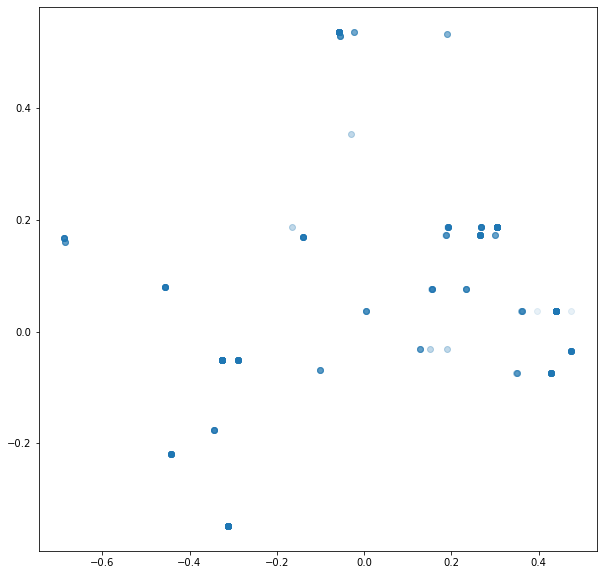

In [283]:
plt.figure(figsize=(10,10))
plt.scatter(shapdt['shap0'],shapdt['shap1'],alpha=0.1)
## alpha means the transparence , many points overlaps here in fact
plt.show()

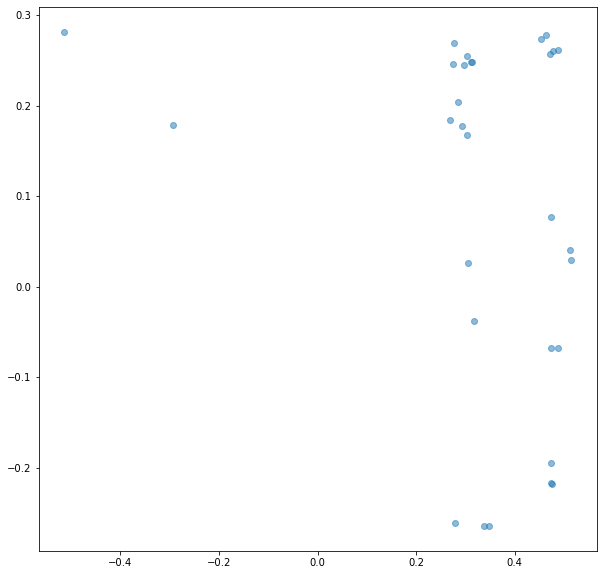

In [286]:
plt.figure(figsize=(10,10))
plt.scatter(dtlime['LIME 0'],dtlime['LIME 1'],alpha=0.5)
## alpha means the transparence , many points overlaps here in fact
plt.show()

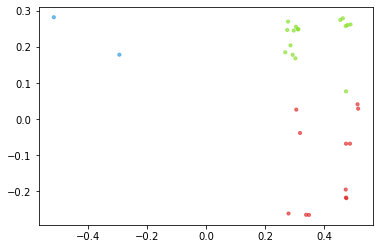

In [297]:
df=dtlime.copy()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
## number of cluster

df['cluster']=kmeans.fit_predict(df[['LIME 0','LIME 1']])
## give the cluster for observation,   the fit only rely on LIME0, LIME1


colors = ['#DF2020', '#81DF20', '#2095DF']
## give color for different cluster

df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
## give color for every point


plt.scatter(df['LIME 0'],df['LIME 1'], c=df.c, alpha = 0.6, s=10)


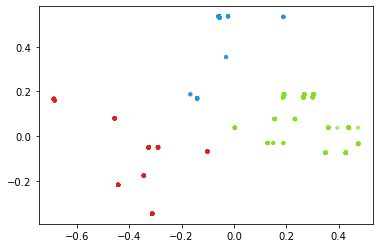

In [298]:


df=shapdt.copy()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)



df['cluster']=kmeans.fit_predict(df[['shap0','shap1']])

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['shap0'],df['shap1'], c=df.c, alpha = 0.6, s=10)
